# Universidad de Costa Rica
## Centro de Investigaciones Espaciales - CINESPA

Proyecto:  Estudio de la radiación de microondas y rayos X como índicadores de la velocidad de propagación de CME's en el medio interplanetario.

Coordinadores: Carolina Salas -
               Felipe Meza
               
Asistente: Yasser Wagon

Periodo: I ciclo- 2018


# Script para el pre-procesado de imagenes solares

A continuación se describe el desarrollo de un script encargado de generar un layout sencillo del sol; en el estudio de eventos de eyecciones de masa coronal, o CME's por sus siglas en ingles. Lo anterior a partir de los siguientes parámetros:

-Resolución de la imagen base del sol (LxA) [px, px].

-Central Position Angle (PA) [deg] : Ángulo del vector de posición central del evento, medido en sentido antihorario desde el Norte solar.

-Angular Width (W) [deg] : Sector que comprende el evento

-Radio del sol en imagen base (r) [px]

-Centro del sol en imagen base (O) [px_x, px_y]

El script en terminos generales se encarga de generar un layout del sol, cuando se estudia una posible eyección de masa coronal en imagenes solares. El layout generado tendrá la misma resolución de la imagen base, un círculo con el mismo radio y ubicación del sol, y el mapeo de la posición y anchura ángular del envento en estudio. El script se encuentra escrito en python y se ejecuta en la versión 2.

La siguiente imagen muestra la salida esperada del script.


![title](Sun_Photos/layoutSUN.png)



## Implementación del Script

Obtendremos el layout de la siguiente imagen solar.

![title](Sun_Photos/sun4.jpg)

La imagen tiene una resolución de 2400x2495 px, el centro del sol se encuentra en el punto (1480 px, 1474 px) y tiene un radio de 555 px. Con respecto al CME, tiene un ángulo PA de 50° y una anchura ángular de 80°.

En primera instancia, se importan las librerías utilizadas por el script; las cuales son, openCV, math, numpy y matplotlib.



In [34]:
import cv2 as cv
import math
import numpy as np
import matplotlib.pyplot as plt

Se definen los parámetros de la imagen base, los cuales serán utilizados en la generación del layout. Se define también la dirección de la imagen base.

In [35]:
imgResolution = (2400, 2495)
cirCenter = (1480, 1474)
r = 555
PA = 50
W = 80
dir = "Sun_Photos/sun4.jpg"

Una vez definido los parámetros en variables, se empezará con la creación del layout. Se definirá una imagen en blanco con la misma resolución de la imagen base. Como las imágenes son matrices, donde cada uno de sus pixeles correspondería con una coordenada dentro de la matriz; se crea una matriz (img) de tamaño imgResolution donde en cada una de sus entradas tiene el valor de 255. El valor de 255 se usa según la convención RGB en imágenes a color de openCV.

Seguidamente, se utiliza la función cv.circle() para dibujar el contorno de donde se encuentra el sol en la imagen base.

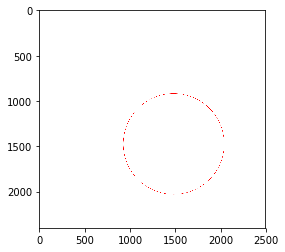

In [36]:
%matplotlib inline
img = np.ones((imgResolution[0], imgResolution[1], 3), np.uint8) * 255
cv.circle(img, cirCenter, r, (255,0,0), 2, cv.LINE_AA)

plt.imshow(img, interpolation='none')


Se mapearán el vector PA y la anchura angular W en la imagen anterior. Para ello es necesario saber el punto en la imagen donde iniciarán los vectores y el punto final donde terminarán. El punto inicial será el centro del círculo cirCenter, mientras que el punto final del vector PA se calcula a continuación

In [37]:
x_PA = int(r * 1.1 * math.cos(3*math.pi/2 - PA*math.pi/180)) + cirCenter[0]
y_PA = int(r * 1.1 * math.sin(3*math.pi/2 - PA*math.pi/180)) + cirCenter[1]

Debido a que se tiene un ángulo y radio dado, es necesario obtener el punto final de PA por medio de una transformación de coordenadas polares a coordenadas cartesianas. A su vez, se debe sumar las coordenadas cirCenter para obtener un eje de coordenadas local en el círculo.
Una vez determinado el punto inicial y final del vector PA, se procede a dibujarlo.

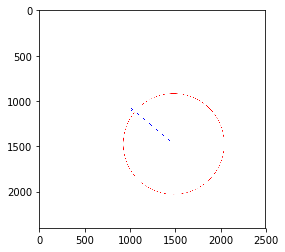

In [38]:
cv.arrowedLine(img, cirCenter, (x_PA, y_PA), (0,0,255), 2, tipLength = 0.05)
plt.imshow(img, interpolation='none')

Finalmente, se procede a delimitar sobre el círculo la anchura ángular W. Para ello, se deden definir los puntos finales de las dos lineas que encerraran el sector W. 

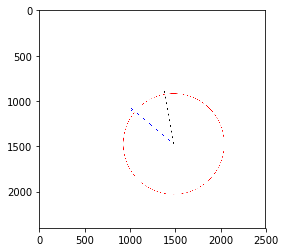

In [39]:
# (x_upW, y_upW) and (x_downW, y_downW) locate W
x_upW = int(r*1.1*math.cos((3*math.pi/2 - PA*math.pi/180) + W*math.pi/360)) + cirCenter[0]
y_upW = int(r*1.1*math.sin(3*math.pi/2 - PA*math.pi/180 + W*math.pi/360)) + cirCenter[1]

x_downW = int(r*1.1*math.cos((3*math.pi/2 - PA*math.pi/180) - W*math.pi/360)) + cirCenter[0]
y_downW = int(r*1.1*math.sin(3*math.pi/2 - PA*math.pi/180 - W*math.pi/360)) + cirCenter[1]

# lines that limits W area
cv.line(img, cirCenter, (x_upW, y_upW), (0,0,0), 2, cv.LINE_AA)
cv.line(img, cirCenter, (x_downW, y_downW), (0,0,0), 2, cv.LINE_AA)

plt.imshow(img, interpolation='none')

La imagen de salida del script se muestra a continuación.

![title](imagenGenerada.jpg)

# Superposición del layout generado y la imagen base

Una vez creado el layout del sol, se procederá a superponerla sobre la imagen base. Para ellos se hará uso de la función cv.addWeighted().

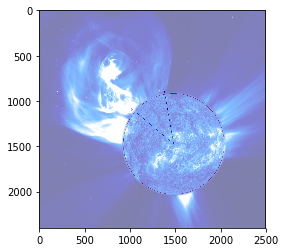

In [40]:
# The base image is loaded
sunImage = cv.imread("Sun_Photos/sun4.jpg")

# Base image and layout overlap
outputImage = cv.addWeighted(img, 0.5, sunImage, 1-0.5, 0, sunImage)

plt.imshow(outputImage, interpolation='none')

La salida final del script es una copia de la imagen original del sol, donde se encuentra superpuesta el layout del evento en estudio. Se observa a continuación, el resultado obtenido.

![title](salida.jpg)